In [2]:
%matplotlib notebook

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
hdf3 = housing_df2.loc[housing_df2['SOURCE'] == 'Residential', : ]
hdf4 = hdf3.dropna(subset=['PRICE'])
hdf5 = hdf4.loc[hdf4['YEAR']> 1991, : ]
hdf6 = hdf5.loc[hdf5['YEAR']< 2018, : ]
#hdf6.to_csv('HousingDataTrim.csv')
housing = hdf6


C:\Users\djhon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
housing.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS',
       'CITY', 'STATE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'QUADRANT', 'YEAR', 'MONTH'],
      dtype='object')

In [6]:
housing_df.dtypes.head(40)

Unnamed: 0             int64
BATHRM                 int64
HF_BATHRM              int64
HEAT                  object
AC                    object
NUM_UNITS            float64
ROOMS                  int64
BEDRM                  int64
AYB                  float64
YR_RMDL              float64
EYB                    int64
STORIES              float64
SALEDATE              object
PRICE                float64
QUALIFIED             object
SALE_NUM               int64
GBA                  float64
BLDG_NUM               int64
STYLE                 object
STRUCT                object
GRADE                 object
CNDTN                 object
EXTWALL               object
ROOF                  object
INTWALL               object
KITCHENS             float64
FIREPLACES             int64
USECODE                int64
LANDAREA               int64
GIS_LAST_MOD_DTTM     object
SOURCE                object
CMPLX_NUM            float64
LIVING_GBA           float64
FULLADDRESS           object
CITY          

In [7]:
salecount = housing.groupby('QUADRANT')['SALEDATE'].count()
salecount

QUADRANT
NE    16776
NW    26199
SE    10993
SW      689
Name: SALEDATE, dtype: int64

In [8]:
NE1 = housing.loc[housing['QUADRANT'] == 'NE', ['QUADRANT','SALEDATE','YEAR']]
NE  = NE1.groupby('YEAR')['SALEDATE'].count()

NW1 = housing.loc[housing['QUADRANT'] == 'NW', ['QUADRANT','SALEDATE','YEAR']]
NW  = NW1.groupby('YEAR')['SALEDATE'].count()

SE1 = housing.loc[housing['QUADRANT'] == 'SE', ['QUADRANT','SALEDATE','YEAR']]
SE  = SE1.groupby('YEAR')['SALEDATE'].count()

SW1 = housing.loc[housing['QUADRANT'] == 'SW', ['QUADRANT','SALEDATE','YEAR']]
SW  = SW1.groupby('YEAR')['SALEDATE'].count()


<IPython.core.display.Javascript object>


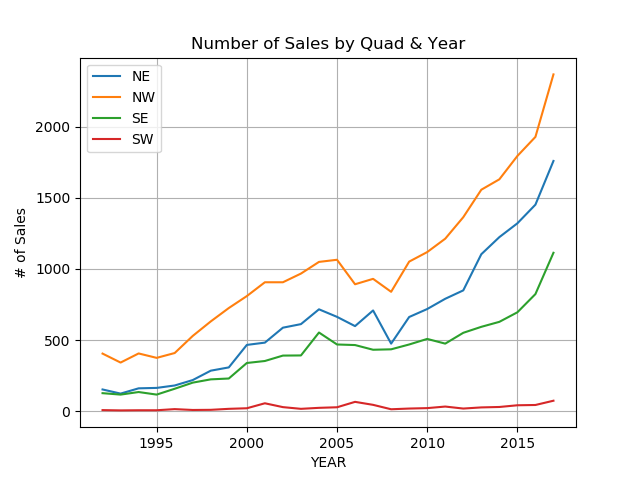

In [9]:
# Chart our data, give it a title, and label the axes
line_chart = NE.plot(kind="line", label='NE', title="Number of Sales by Quad & Year", grid=True)
line_chart = NW.plot(kind="line", label='NW')
line_chart = SE.plot(kind="line", label='SE')
line_chart = SW.plot(kind="line", label='SW')

plt.grid()
line_chart.set_xlabel("YEAR")
line_chart.set_ylabel("# of Sales")
plt.legend(loc="best")
plt.savefig('1. NumofSalesbyQuad&Year.png')
plt.show()


In [ ]:
#figsize=(20,10)
#plt.clf()